In [ ]:
from os import listdir
from os.path import isdir, isfile, join

import numpy as np

from tools import *
import matplotlib.pyplot as plt


In [3]:
table = pd.read_csv("/home/datasets4/stein/weather_station_MPI/extreme_analysis_complete.csv")

In [4]:
table2 = pd.read_csv("/home/datasets4/stein/station_processed/extreme_station.csv")

In [5]:
table3 = table.merge(table2, on="datetime")

In [47]:
def single_row(storage, axs, reach, ind = 0, top = False, bottom = False, color=["green", "darkgreen"], plot_std = False, plot_zero=False, labelN = "", print_delay = False, print_side=False):
    labels = table3.columns[1:]
    for x in range(8):
        data = np.array(storage[str(ind) + "_" + str(x)])

        mean = np.mean(data, axis=0)         
        std = np.std(data, axis=0) 
        up = mean + 1.5 * std
        down = mean - 1.5 * std
        axs[x].plot(np.arange(-reach,reach+1), mean, color = color[1], linewidth = 3, label = labelN)
        if plot_std:
            axs[x].plot(np.arange(-reach,reach+1), up, color = color[0])
            axs[x].plot(np.arange(-reach,reach+1),down, color = color[0])
            axs[x].fill_between(np.arange(-reach,reach+1), up, down, where=up > down,
                    facecolor=color[0], alpha=0.25, label = "Period 1.5 Std")
        #axs[ind, x].set_title("Bruh",fontsize=20)
        #axs[x].legend()
        axs[x].set_xlabel("laggs")
        if plot_zero:
            axs[x].vlines(0,0.25,1, color = "black", linestyle="dashed", linewidth = 1.5)
        x_cord = np.argmax(mean)
        if x_cord == np.argmin(mean): 
            x_cord = 0
        else:
            x_cord = x_cord - reach
        if print_delay:
            if x != ind:
                axs[x].vlines(x_cord,0, 1, color = color[1], linestyle="dashed", linewidth = 3, label= "Peak")
        #axs[x].set_ylim([0.25,1.05])
        if top:
            axs[x].set_title(labels[x], fontsize=25)

        if bottom:
            axs[x].set_xlabel("Lags", fontsize=25)
            axs[x].xaxis.set_tick_params(labelsize=20)
            axs[x].get_xaxis().set_visible(True)

        else:
            axs[x].get_xaxis().set_visible(False)
            
        if x != 0:
            axs[x].set_yticklabels([])
        else:
            axs[x].set_ylabel(labels[ind], fontsize = 25)
            axs[x].yaxis.set_tick_params(labelsize=15)
        if ind == 3 and print_side:
            axs[5].text(reach + 4,0.5, "Pearson correlation coefficient", fontsize = 20, rotation=90)
    if top:
        axs[0].legend(fontsize = 20)




In [32]:
def correlate_plot(original, reach = 15, bothWays = True, corr = "pearson"):
    corrResults = {}
    for x in original.columns:
        plot = copy.deepcopy(original)
        org = copy.deepcopy(plot[x])
        corrs = []
        if bothWays: 
            for y in range(-reach, reach+1,1):
                plot[x] = org.shift(y)
                corrs.append(plot.corr(method= corr)[x].values) # we only need one line
        else:
            for y in range(0, -reach,-1):
                plot[x] = org.shift(y)
                corrs.append(plot.corr(method = corr)[x].values) # we only need one line
        corrResults[x] = corrs
    return corrResults

In [33]:
a = correlate_plot(table3[table3.columns[1:]])

In [34]:
def get_data_object(inp):
    storage = {}
    for ind, key in enumerate(inp.keys()):
        for x in range (8):
            Y = np.array(inp[key]).T[x]
            plotKey = str(ind) + "_" + str(x)
            if plotKey in storage.keys(): 
                storage[plotKey].append(Y)
            else:
                storage[plotKey] = [Y]
    return storage

In [35]:
b = get_data_object(a)

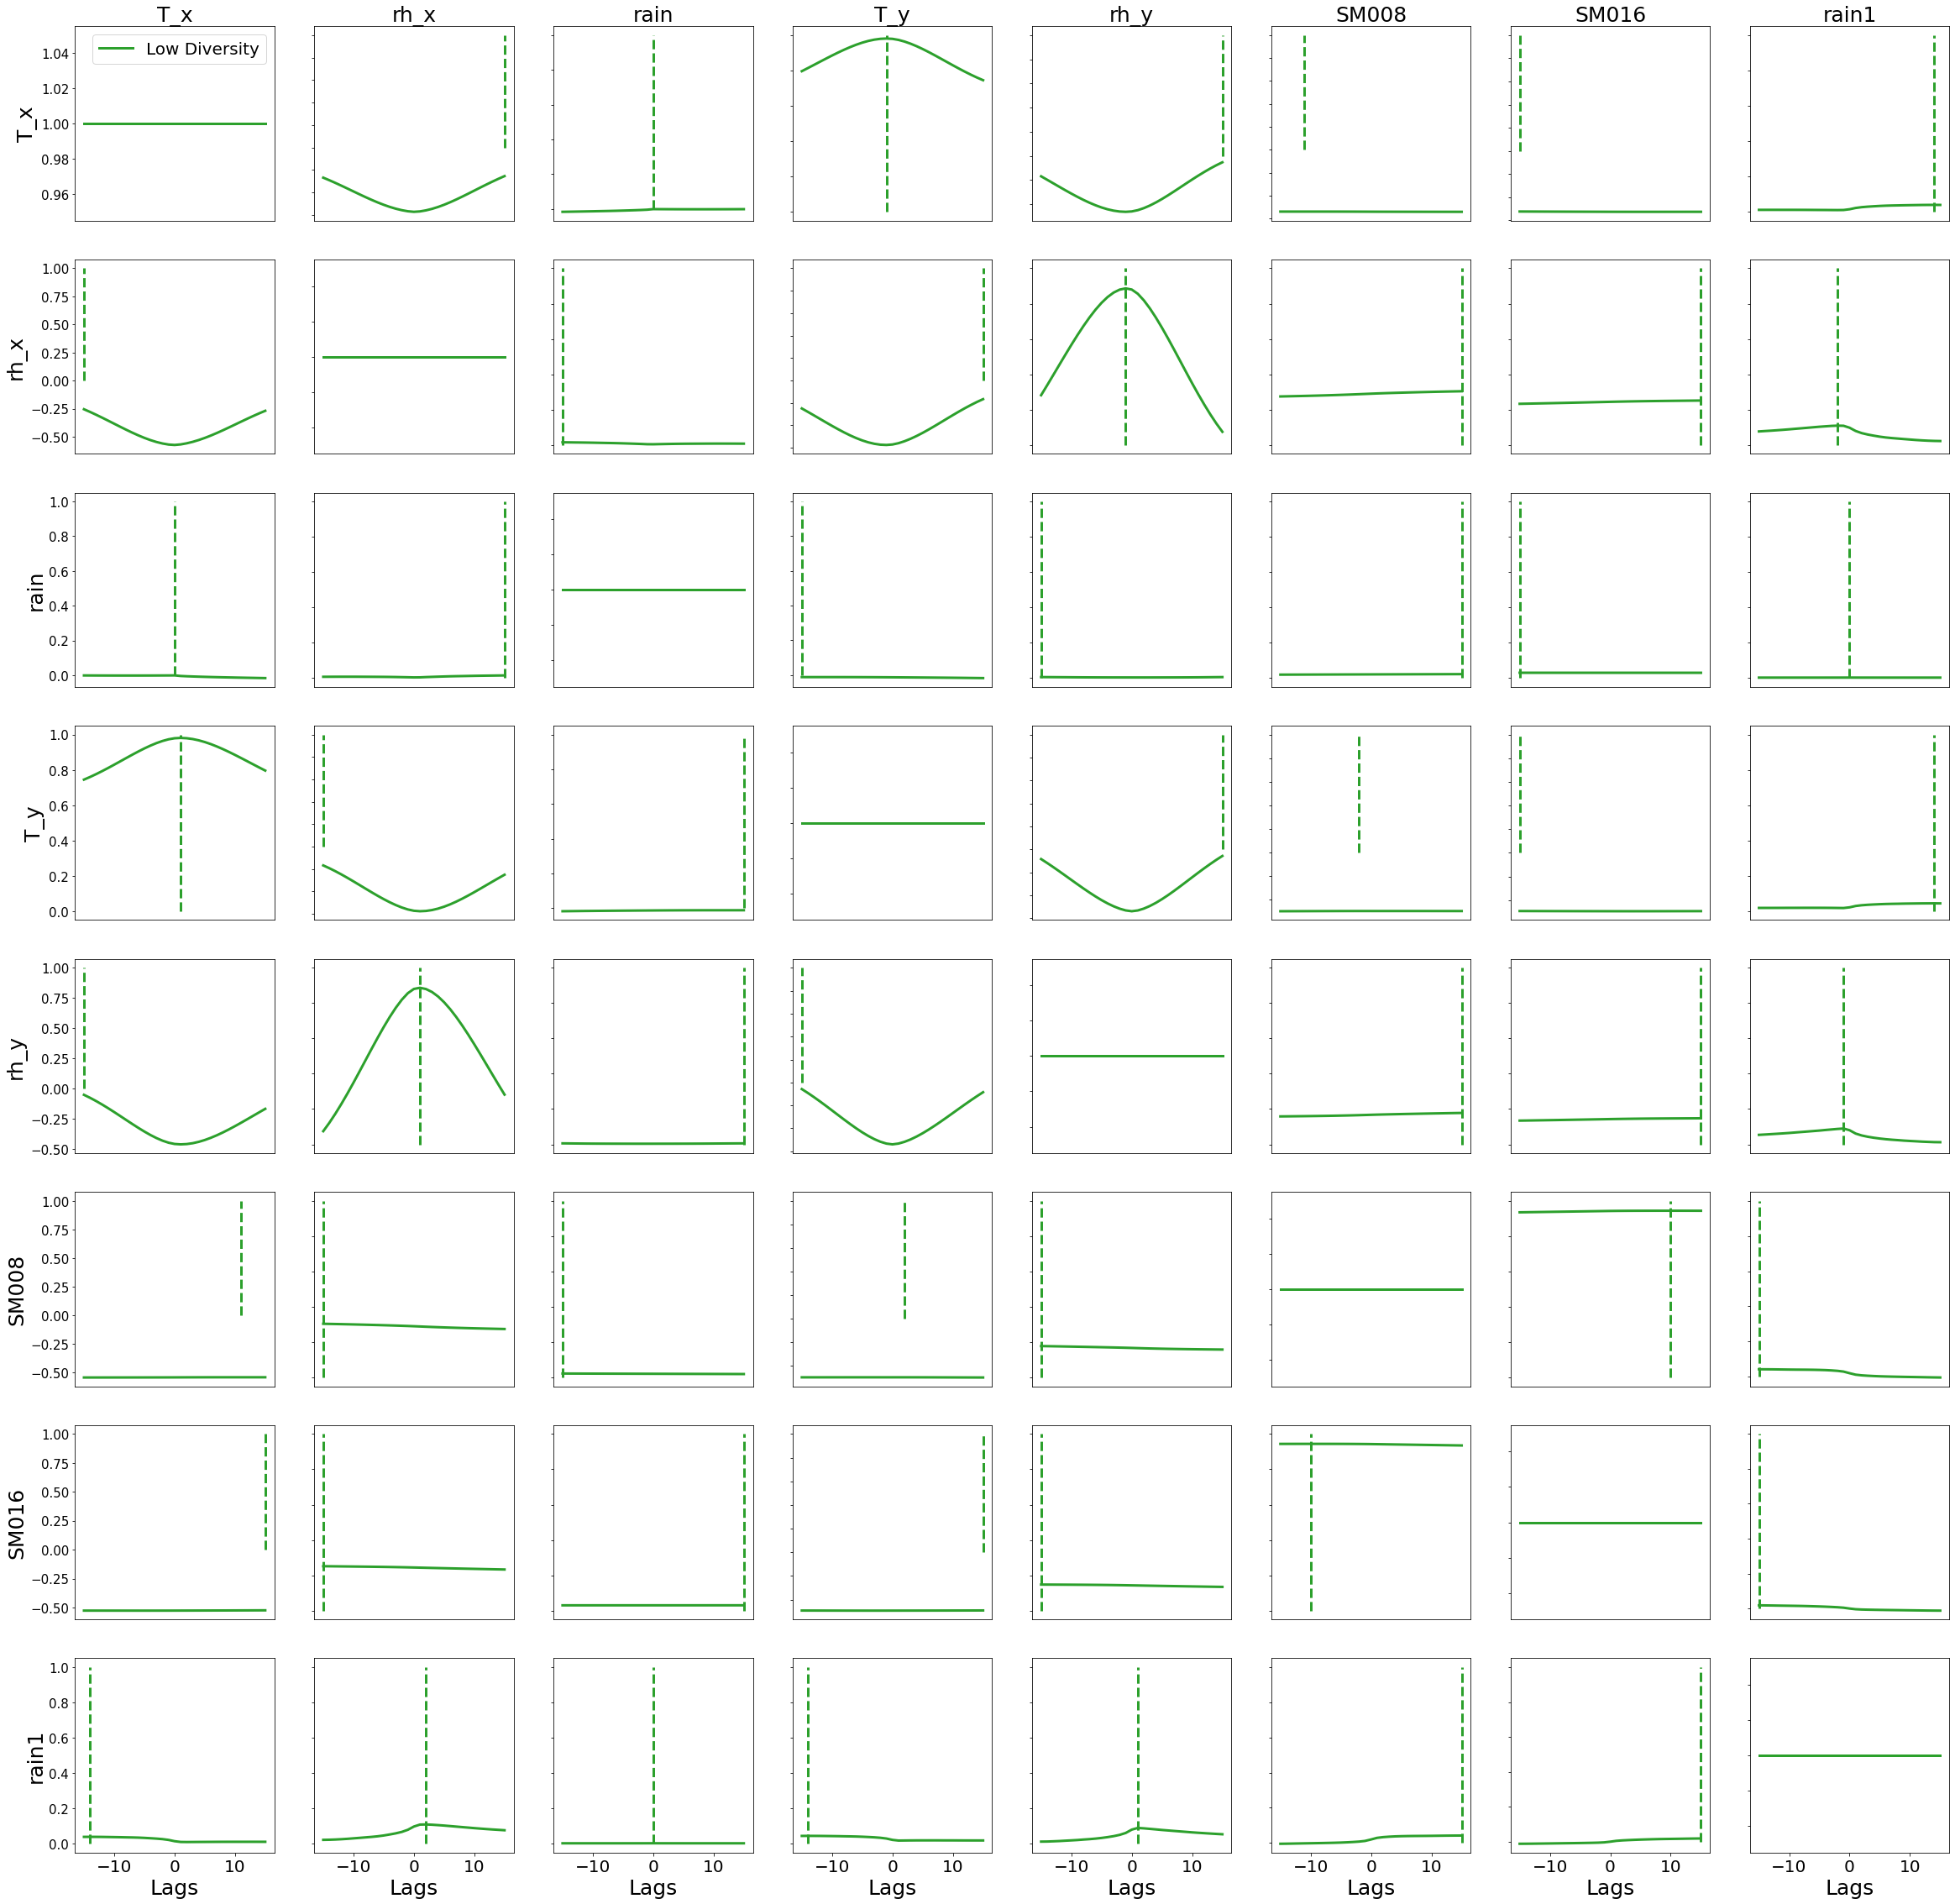

In [ ]:
fig, axs = plt.subplots(8, 8,figsize=(40,40))
colorRange= ["C2","C1","C8", "C0","C3","C4","C5", "C6", "C7", "C8", "grey", "cyan"]
seasons = ["Low Diversity", "High diversity"]
single_row(b,axs[0], 15, 0, top =True , bottom=False, color=[colorRange[0],colorRange[0]], labelN = seasons[0], print_delay=True)
single_row(b,axs[1], 15, 1, top =False , bottom=False, color=[colorRange[0],colorRange[0]], labelN = seasons[0], print_delay=True)
single_row(b,axs[2], 15, 2, top =False , bottom=False, color=[colorRange[0],colorRange[0]], labelN = seasons[0], print_delay=True)
single_row(b,axs[3], 15, 3, top =False , bottom=False, color=[colorRange[0],colorRange[0]], labelN = seasons[0], print_delay=True)
single_row(b,axs[4], 15, 4, top =False , bottom=False, color=[colorRange[0],colorRange[0]], labelN = seasons[0], print_delay=True)
single_row(b,axs[5], 15, 5, top =False , bottom=False, color=[colorRange[0],colorRange[0]], labelN = seasons[0], print_delay=True)
single_row(b,axs[6], 15, 6, top =False , bottom=False, color=[colorRange[0],colorRange[0]], labelN = seasons[0], print_delay=True)
single_row(b,axs[7], 15, 7, top =False , bottom=True, color=[colorRange[0],colorRange[0]], labelN = seasons[0], print_delay=True)
